In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Grab and process the raw data.
data_path = ("imdb_labelled.txt"
            )
rev_raw = pd.read_csv(data_path, delimiter= '\t', header=None)
rev_raw.columns = ['Review', 'Sentiment']

In [3]:
#keywords = ['awful', 'disappointing', 'terrible', 'sucked', "don't", 'dislike']

keywords = ['great', 'good', 'love', 'cool', 'incredible', 'best', 'liked', 'delivering', 'worth']

for key in keywords:
    #Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    rev_raw[str(key)] = rev_raw.Review.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )
    


In [4]:
rev_raw['Sentiment'] = (rev_raw['Sentiment'] == 1)
# Note that if you run this cell a second time everything will become false.
# So... Don't.

In [5]:
rev_raw.dtypes

Review        object
Sentiment       bool
great           bool
good            bool
love            bool
cool            bool
incredible      bool
best            bool
liked           bool
delivering      bool
worth           bool
dtype: object

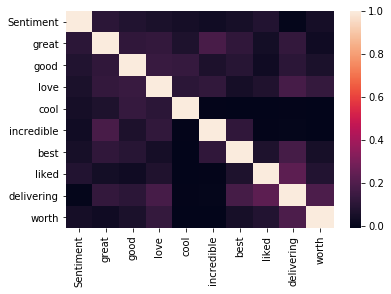

In [6]:
sns.heatmap(rev_raw.corr())

In [7]:
data = rev_raw[keywords]
target = rev_raw['Sentiment']

In [8]:
# Our data is binary/ boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

#Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 748 points : 328


In [9]:
# Test your model with different holdout groups.

from sklearn.model_selection import train_test_split
# Use train_test_split to create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=20)
print('With 20% Holdout: ' + str(bnb.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(bnb.fit(data, target).score(data, target)))

With 20% Holdout: 0.5266666666666666
Testing on Sample: 0.5614973262032086


In [10]:
from sklearn.model_selection import cross_val_score
cross_val_score(bnb, data, target, cv=10)

array([0.55263158, 0.53947368, 0.6       , 0.54666667, 0.58666667,
       0.52      , 0.71621622, 0.52702703, 0.51351351, 0.51351351])

In [11]:
sklearn.metrics.confusion_matrix(target, y_pred, labels=None, sample_weight=None)

array([[338,  24],
       [304,  82]], dtype=int64)

In [12]:
# Grab and process the raw data.
data_path = ("imdb_labelled.txt"
            )
rev_raw = pd.read_csv(data_path, delimiter= '\t', header=None)
rev_raw.columns = ['Review', 'Sentiment']

In [13]:
keywords = ['boring', 'disgusting', 'brutal',
             'predictable', 'weak', 'worth', 'flawed', 
            'silly', 'stupid', 'disappointing', 
            'tired', 'uninteresting'
           ]
for key in keywords:
    #Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    rev_raw[str(key)] = rev_raw.Review.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )
    


In [14]:
rev_raw['Sentiment'] = (rev_raw['Sentiment'] == 0)
# Note that if you run this cell a second time everything will become false.
# So... Don't.

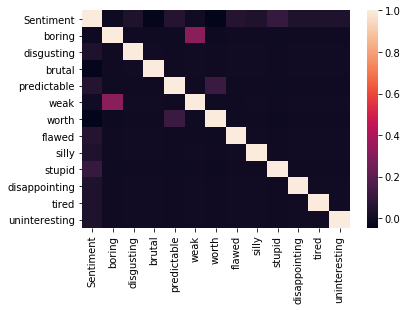

In [15]:
sns.heatmap(rev_raw.corr())

In [16]:
data = rev_raw[keywords]
target = rev_raw['Sentiment']

In [17]:
# Our data is binary/ boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

#Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 748 points : 345


In [18]:
# Test your model with different holdout groups.

from sklearn.model_selection import train_test_split
# Use train_test_split to create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=20)
print('With 20% Holdout: ' + str(bnb.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(bnb.fit(data, target).score(data, target)))

With 20% Holdout: 0.5266666666666666
Testing on Sample: 0.5387700534759359


In [19]:
from sklearn.model_selection import cross_val_score
cross_val_score(bnb, data, target, cv=10)

array([0.51315789, 0.53947368, 0.54666667, 0.56      , 0.53333333,
       0.53333333, 0.54054054, 0.52702703, 0.5       , 0.51351351])

In [20]:
sklearn.metrics.confusion_matrix(target, y_pred, labels=None, sample_weight=None)

array([[385,   1],
       [344,  18]], dtype=int64)

## Trying to detect postive or negative reviews has the same sensitivity/ specificity. 

In [21]:
# Grab and process the raw data.
data_path = ("imdb_labelled.txt"
            )
rev_raw = pd.read_csv(data_path, delimiter= '\t', header=None)
rev_raw.columns = ['Review', 'Sentiment']

In [22]:
keywords = ['boring', 'disgusting', 'brutal',
             'predictable', 'weak', 'worth', 'flawed', 
            'silly', 'stupid', 'disappointing', 
            'tired', 'uninteresting'
           ]
for key in keywords:
    #Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    rev_raw[str(key)] = rev_raw.Review.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )
    


In [23]:
rev_raw['Sentiment'] = (rev_raw['Sentiment'] == 0)
# Note that if you run this cell a second time everything will become false.
# So... Don't.

In [24]:
rev_raw['short'] = rev_raw.Review.str.len() <= 10

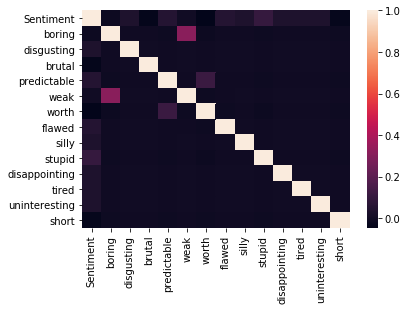

In [25]:
sns.heatmap(rev_raw.corr())

In [26]:
data = rev_raw[keywords + ['short']]
target = rev_raw['Sentiment']

In [27]:
# Our data is binary/ boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

#Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 748 points : 345


In [28]:
# Test your model with different holdout groups.

from sklearn.model_selection import train_test_split
# Use train_test_split to create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=20)
print('With 20% Holdout: ' + str(bnb.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(bnb.fit(data, target).score(data, target)))

With 20% Holdout: 0.5266666666666666
Testing on Sample: 0.5387700534759359


In [29]:
from sklearn.model_selection import cross_val_score
cross_val_score(bnb, data, target, cv=10)

array([0.51315789, 0.53947368, 0.54666667, 0.56      , 0.53333333,
       0.53333333, 0.54054054, 0.52702703, 0.5       , 0.51351351])

In [30]:
sklearn.metrics.confusion_matrix(target, y_pred, labels=None, sample_weight=None)

array([[385,   1],
       [344,  18]], dtype=int64)

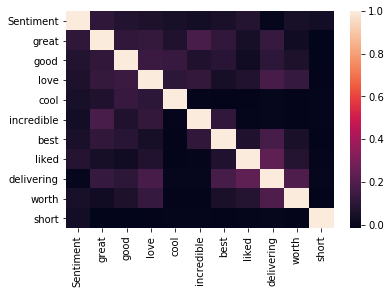

In [32]:
# Grab and process the raw data.
data_path = ("imdb_labelled.txt"
            )
rev_raw = pd.read_csv(data_path, delimiter= '\t', header=None)
rev_raw.columns = ['Review', 'Sentiment']

#keywords = ['awful', 'disappointing', 'terrible', 'sucked', "don't", 'dislike']

keywords = ['great', 'good', 'love', 'cool', 'incredible', 'best', 'liked', 'delivering', 'worth']

for key in keywords:
    #Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    rev_raw[str(key)] = rev_raw.Review.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )
    
rev_raw['Sentiment'] = (rev_raw['Sentiment'] == 1)
# Note that if you run this cell a second time everything will become false.
# So... Don't.

rev_raw['short'] = rev_raw.Review.str.len() <= 10

data = rev_raw[keywords + ['short']]
target = rev_raw['Sentiment']

sns.heatmap(rev_raw.corr())

In [33]:
# Our data is binary/ boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

#Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 748 points : 326


In [34]:
# Test your model with different holdout groups.

from sklearn.model_selection import train_test_split
# Use train_test_split to create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=20)
print('With 20% Holdout: ' + str(bnb.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(bnb.fit(data, target).score(data, target)))

With 20% Holdout: 0.5266666666666666
Testing on Sample: 0.5641711229946524


In [35]:
from sklearn.model_selection import cross_val_score
cross_val_score(bnb, data, target, cv=10)

array([0.56578947, 0.52631579, 0.6       , 0.56      , 0.58666667,
       0.52      , 0.71621622, 0.54054054, 0.51351351, 0.51351351])

In [36]:
sklearn.metrics.confusion_matrix(target, y_pred, labels=None, sample_weight=None)

array([[337,  25],
       [301,  85]], dtype=int64)

### The model seems better at identifying positive reviews, and it would seem that positive reviews tend to be shorter. This makes some sense intuitively because you could assume people are more likely to write more when they are unhappy.

This could be better. Perhaps I should manually perform the cross_val_score?